# Training Model Steps
- Scaling all the potential predictors(Use StandarScaler)
- Feature Selection
- Run all possible Machine Learning
- Fine tune the model and incoport L regulation 


# Import all libraries

In [24]:
# Basic Import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [25]:
# Read the data
path = os.path.join("data","bodyfat-comp.csv")
df = pd.read_csv(path)


# 1. Scaling all numerical variables with StanderScaler

In [26]:
# separate predictors and dependent variable
x = df.drop(columns = ['Id','Density','BodyFat'], axis =1) #Predictor Features
y = df['BodyFat'] #Label

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)



In [28]:
# Create new folder named saved_picklefile
folder_name = 'saved_picklefile'
new_folder_path = os.path.join(os.getcwd(),folder_name)
if not os.path.exists(new_folder_path):
    os.mkdir(new_folder_path)
    print(f'The folder {folder_name} has been created at {new_folder_path}')
else:
    print(f'The folder {folder_name} already exists at {new_folder_path}')


#save scaler file

scaler_file = "scale_numeric_var.pkl"
path2 = os.path.join(new_folder_path,scaler_file)
if not os.path.exists(path2):
    pickle.dump(scaler, open(path2,"wb"))
    print(f"The file {scaler_file} has been saved at {path2}")  
else:
    print(f"The file {scaler_file} already exists")

The folder saved_picklefile already exists at c:\Users\cindydao\ineuron-ML\mlproject\src\notebook\saved_picklefile
The file scale_numeric_var.pkl already exists


In [29]:
X_scaled = scaler.transform(x)

In [30]:
x

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
1,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
2,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
3,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
4,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,67,227.75,72.75,41.3,115.8,113.4,109.8,65.6,46.0,25.4,35.3,29.8,19.5
164,68,155.50,69.25,36.3,97.4,84.3,94.4,54.3,37.5,22.6,29.2,27.3,18.5
165,69,215.50,70.50,40.8,113.7,107.6,110.0,63.3,44.0,22.6,37.5,32.6,18.8
166,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5


# 2. Feature Selection

#### Apply Feature Selection to avoid overfitting

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [32]:
#Split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((134, 13), (34, 13))

In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [34]:

linear_model = LinearRegression()
k_list = []
rmse_test_list = []
rmse_train_list = []
for k in range(1,14,1):
    # define feature selection
    fs = SelectKBest(score_func=f_classif, k=k)
    # apply feature selection
    fs.fit(X_train, y_train)
    
    X_train_selected = fs.transform(X_train)
    X_test_selected = fs.transform(X_test)
    
    #train the model
    linear_model.fit(X_train_selected,y_train)
    #predict the output
    y_train_predict = linear_model.predict(X_train_selected)
    y_test_predict = linear_model.predict(X_test_selected)
    #evaluate the model
    mae_train, rmse_train, r2_square_train = evaluate_model(y_train,y_train_predict) 
    mae_test, rmse_test, r2_square_test = evaluate_model(y_test,y_test_predict)

    k_list.append(k)
    rmse_test_list.append(rmse_test)
    rmse_train_list.append(rmse_train)
    print(f'For k = {k}')
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_square_train))

    print('----------------------------------')
        
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_square_test))

    print('----------------------------------')
    print('----------------------------------')
    print('----------------------------------')


For k = 1
Model performance for Training set
- Root Mean Squared Error: 4.8245
- Mean Absolute Error: 3.9887
- R2 Score: 0.6434
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.6526
- Mean Absolute Error: 3.6372
- R2 Score: 0.6477
----------------------------------
----------------------------------
----------------------------------
For k = 2
Model performance for Training set
- Root Mean Squared Error: 4.7406
- Mean Absolute Error: 3.9381
- R2 Score: 0.6557
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.6078
- Mean Absolute Error: 3.6906
- R2 Score: 0.6544
----------------------------------
----------------------------------
----------------------------------
For k = 3
Model performance for Training set
- Root Mean Squared Error: 4.7077
- Mean Absolute Error: 3.9181
- R2 Score: 0.6605
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.4065
- Mean A

Text(0, 0.5, 'Mean Square Error')

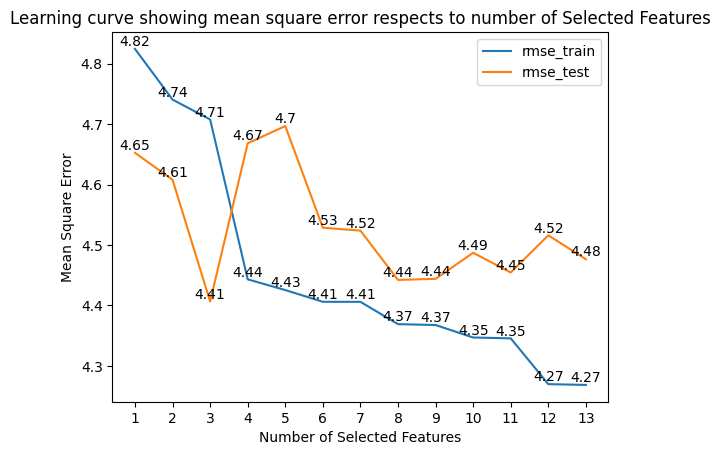

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
sns.lineplot(x = k_list, y = rmse_train_list,label = 'rmse_train', ax = ax)
for i in range(len(rmse_train_list)):
    ax.text(k_list[i],rmse_train_list[i],str(rmse_train_list[i].round(2)),ha = 'center', va='bottom')
sns.lineplot(x = k_list, y = rmse_test_list,label = 'rmse_test', ax=ax)
for i in range(len(rmse_test_list)):
    ax.text(k_list[i],rmse_test_list[i],str(rmse_test_list[i].round(2)),ha = 'center', va='bottom')
ax.set_xticks(k_list)
ax.set_title("Learning curve showing mean square error respects to number of Selected Features")
ax.set_xlabel('Number of Selected Features')
ax.set_ylabel('Mean Square Error')

In [36]:
type(ax)

matplotlib.axes._axes.Axes

#### Firgure 1: The graph shows that,at k = 8 or 9, we have the lowest mean square error on train and test sets. However, when looking at there error from the report, at k = 8 Mean square error is 4.4422, R_2 score is 0.6788, while at k = 9, MSE is 4.4440 larger than k=8, and R2 score is 0.6786 smaller than R2 of K=8. Therefore, this project select 8 features.

In [37]:
all_feature_names = x.columns

In [38]:
fs = SelectKBest(score_func=f_classif, k=8)
# apply feature selection that select 9 features
fs.fit(X_train, y_train)
selected_feature_names = fs.get_feature_names_out(all_feature_names)
X_train_selected = fs.transform(X_train)
X_test_selected = fs.transform(X_test)

In [39]:
all_feature_names

Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')

In [40]:
print(f'These are the following selected features: {selected_feature_names}')


These are the following selected features: ['Weight' 'Neck' 'Chest' 'Abdomen' 'Hip' 'Thigh' 'Knee' 'Biceps']


# 3. Run all possible ML models

In [41]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
rmse_train_list = []
r2_test_list =[]
rmse_test_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_selected, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    rmse_train_list.append(model_train_rmse)
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_test_list.append(model_test_r2)
    rmse_test_list.append(model_test_rmse)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4.3690
- Mean Absolute Error: 3.6836
- R2 Score: 0.7076
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.4422
- Mean Absolute Error: 3.4033
- R2 Score: 0.6788


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.9243
- Mean Absolute Error: 4.0257
- R2 Score: 0.6285
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.8563
- Mean Absolute Error: 4.0363
- R2 Score: 0.6161


Ridge
Model performance for Training set
- Root Mean Squared Error: 4.3729
- Mean Absolute Error: 3.6754
- R2 Score: 0.7071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.4553
- Mean Absolute Error: 3.4190
- R2 Score: 0.6769


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.7462
- Mean Absolute Error: 3.7515
- R2 Score: 0.6549
-----------------------

In [43]:
model_list

['Linear Regression',
 'Lasso',
 'Ridge',
 'K-Neighbors Regressor',
 'Decision Tree',
 'Random Forest Regressor',
 'XGBRegressor',
 'CatBoosting Regressor',
 'AdaBoost Regressor']

Text(0, 0.5, 'R2 Score')

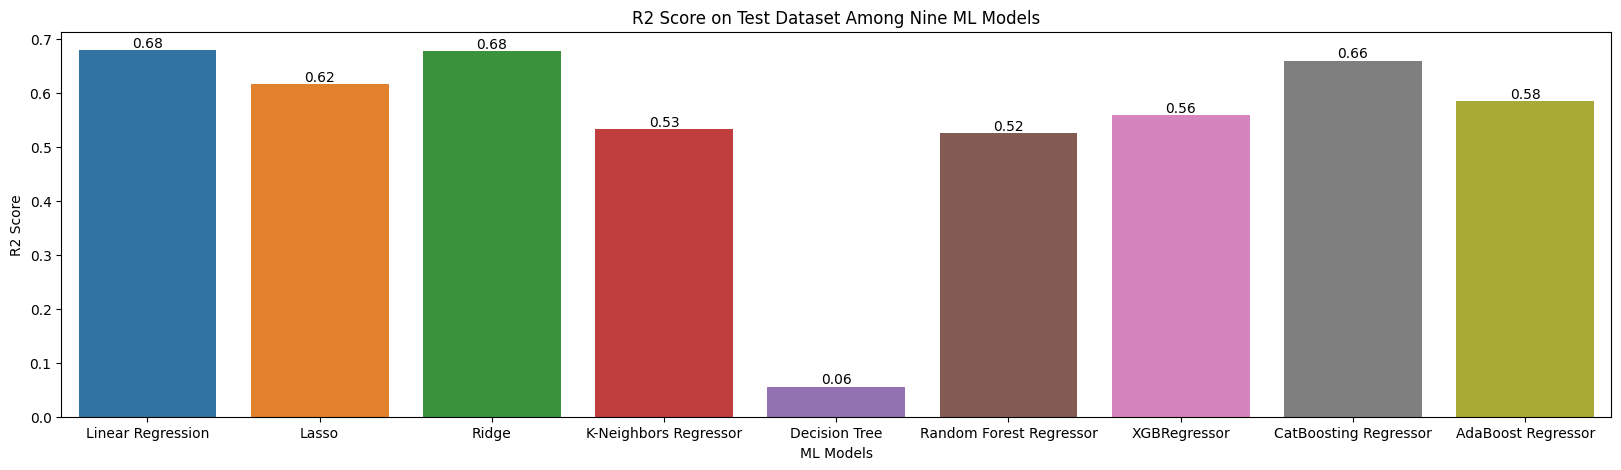

In [44]:
fig = plt.figure(figsize=(20,5))
ax = sns.barplot(x =model_list, y = r2_test_list)
for i, value in enumerate(r2_test_list):
    ax.text(i,value,str(value.round(2)),ha='center',va='bottom')
ax.set_title("R2 Score on Test Dataset Among Nine ML Models")
ax.set_xlabel("ML Models")
ax.set_ylabel("R2 Score")

#### Figure 2: Among these 9 models, Linear Regression has the highest R2 score, 0.68, on the test set.

Text(0, 0.5, 'Mean Square Error')

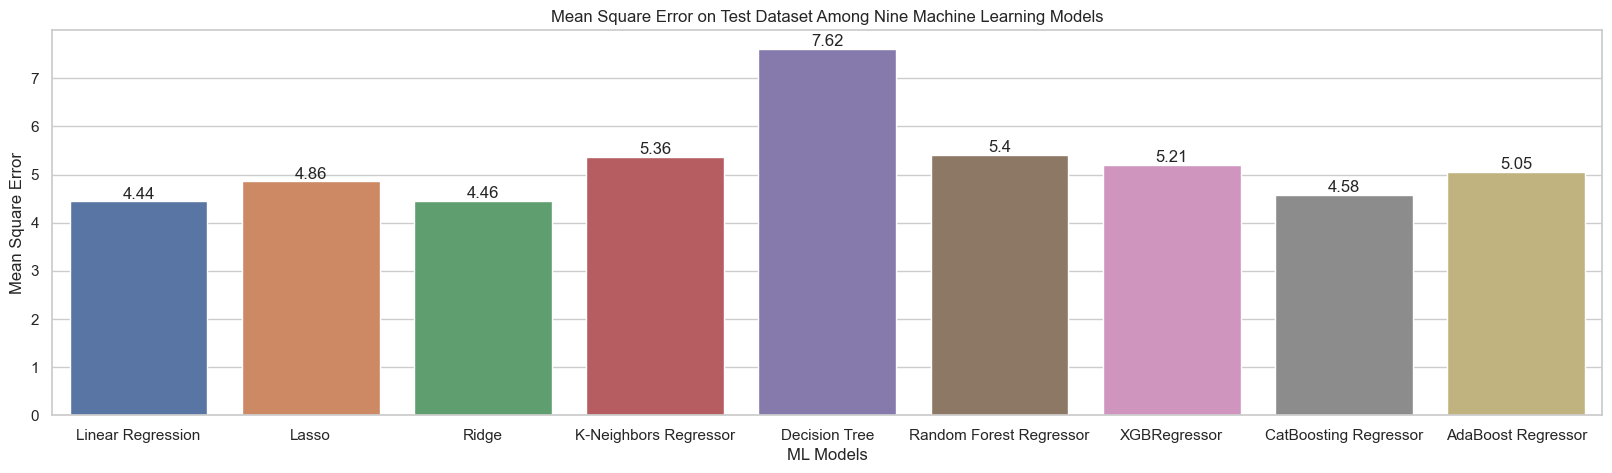

In [54]:
fig = plt.figure(figsize=(20,5))
sns.set(style = "whitegrid")
ax = sns.barplot(x =model_list, y = rmse_test_list)
for i, value in enumerate(rmse_test_list):
    ax.text(i,value,str(value.round(2)),ha='center',va='bottom')

ax.set_title("Mean Square Error on Test Dataset Among Nine Machine Learning Models")
ax.set_xlabel("ML Models")
ax.set_ylabel("Mean Square Error")

#### Figure 3: Among nine models, Linear Regression has the lowest mean square error on test set, which is 4.44

In [56]:
perform_df=pd.DataFrame(data = {'ModelName':model_list, 'rmseTrain':rmse_train_list, 
             'rmse_test':rmse_test_list})
meltPer_df = pd.melt(perform_df,id_vars = 'ModelName')

In [67]:
meltPer_df = meltPer_df.rename(columns={'variable':'DataSetType','value':'rmse_score'})

Text(0.5, 0, 'Model Name')

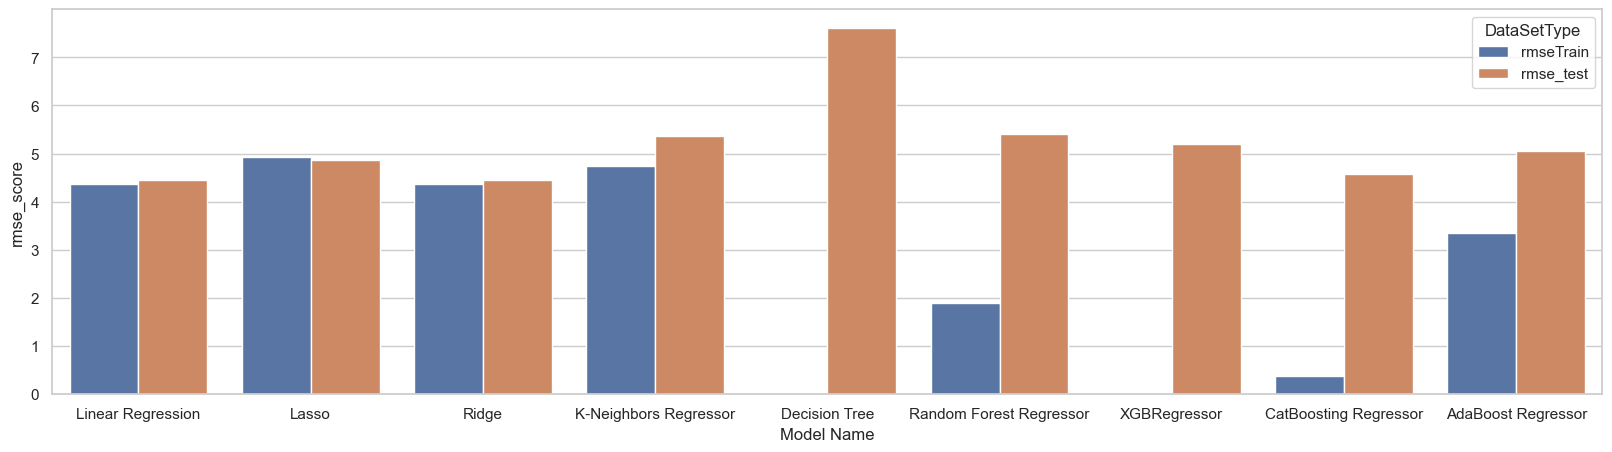

In [68]:
fig = plt.figure(figsize=(20,5))
sns.barplot(data=meltPer_df,x = 'ModelName',y = 'rmse_score', hue='DataSetType')
plt.xlabel('Model Name')


# 4. Fine-tune the model

### From above result, the 8 selected features give the best performance on Linear Regression model.

In [70]:
from sklearn.model_selection import GridSearchCV


In [75]:
grid = {'fit_intercept':[True,False],
        'positive':[True,False],
        ''}
linear_model = LinearRegression()
grid_search = GridSearchCV(estimator=linear_model, param_grid=grid,n_jobs=-1,cv=5)

In [76]:
grid_search.fit(X_train_selected,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [79]:
grid_search.cv_results_

{'mean_fit_time': array([0.00391278, 0.00503092, 0.00431304, 0.00340924]),
 'std_fit_time': array([0.00074614, 0.00105326, 0.00373047, 0.00124731]),
 'mean_score_time': array([0.00120306, 0.00090313, 0.00110512, 0.00121288]),
 'std_score_time': array([0.00039807, 0.00049321, 0.00020209, 0.00081917]),
 'param_fit_intercept': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_positive': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True, 'positive': True},
  {'fit_intercept': True, 'positive': False},
  {'fit_intercept': False, 'positive': True},
  {'fit_intercept': False, 'positive': False}],
 'split0_test_score': array([ 0.58483848,  0.6572447 , -7.53442144, -8.89572844]),
 'split1_test_score': array([ 0.74584691,  0.74907974, -3.95176577, -4.94078102]),


In [82]:
grid_search.best_params_

{'fit_intercept': True, 'positive': False}

In [85]:
finetune_linearmodel = LinearRegression(fit_intercept=True,positive=False)

In [87]:
finetune_linearmodel.fit(X_train_selected,y_train)

y_train_pred = finetune_linearmodel.predict(X_train_selected)
y_test_pred = finetune_linearmodel.predict(X_test_selected)
    
# Evaluate Test dataset

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

In [88]:
model_test_rmse

4.442165062372895